# Imported Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats
import numpy as np

# Source

In [2]:
inactivity_source_path = Path("Resources/500_Cities__No_leisure-time_physical_activity_among_adults_aged___18_years_20240314.csv")
obesity_source_path = Path("Resources/500_Cities__Obesity_among_adults_aged___18_years_20240318.csv")
inactivity_source_data = pd.read_csv(inactivity_source_path)
obesity_source_data = pd.read_csv(obesity_source_path)

# State Analysis

Filtered and Cleaned Source Data

In [3]:
filtered_inactivity_source_data = inactivity_source_data[["StateDesc", "Data_Value", "PopulationCount"]]
percentage = filtered_inactivity_source_data["Data_Value"]*0.01
inactivity_population = percentage * filtered_inactivity_source_data["PopulationCount"]
inactivity_population = round(inactivity_population)
inactivity_population = inactivity_population.rename("InactivityPopulation")
filtered_inactivity_source_data = pd.concat([filtered_inactivity_source_data, inactivity_population],axis = 1)
filtered_inactivity_source_data = filtered_inactivity_source_data[filtered_inactivity_source_data["Data_Value"].notna()]
calculation_data = filtered_inactivity_source_data.groupby(by = "StateDesc").sum()
percentage = calculation_data["InactivityPopulation"]/calculation_data["PopulationCount"]
state_filtered_inactivity_source_data = percentage.rename("Inactivity_Percentage")

In [4]:
filtered_obesity_source_data = obesity_source_data[["StateDesc", "Data_Value", "PopulationCount"]]
percentage = filtered_obesity_source_data["Data_Value"]*0.01
obesity_population = percentage * filtered_obesity_source_data["PopulationCount"]
obesity_population = round(obesity_population)
obesity_population = obesity_population.rename("ObesityPopulation")
filtered_obesity_source_data = pd.concat([filtered_obesity_source_data, obesity_population],axis = 1)
filtered_obesity_source_data = filtered_obesity_source_data[filtered_obesity_source_data["Data_Value"].notna()]
calculation_data = filtered_obesity_source_data.groupby(by = "StateDesc").sum()
percentage = calculation_data["ObesityPopulation"]/calculation_data["PopulationCount"]
state_filtered_obesity_source_data = percentage.rename("Obesity_Percentage")

In [5]:
state_inactivity_obesity_source_data = pd.merge(state_filtered_obesity_source_data, state_filtered_inactivity_source_data,how = "inner", on = ["StateDesc"])
state_inactivity_obesity_source_data = state_inactivity_obesity_source_data.drop(index = ["United States","District of C"])
state_inactivity_obesity_source_data_sorted_by_inactivity = state_inactivity_obesity_source_data.sort_values(by = ["Inactivity_Percentage"], ascending = False)
state_inactivity_obesity_source_data_sorted_by_obesity = state_inactivity_obesity_source_data.sort_values(by = ["Obesity_Percentage"], ascending = False)
state_inactivity_obesity_source_data.to_csv("state_inactivity_obesity_source_data.csv")

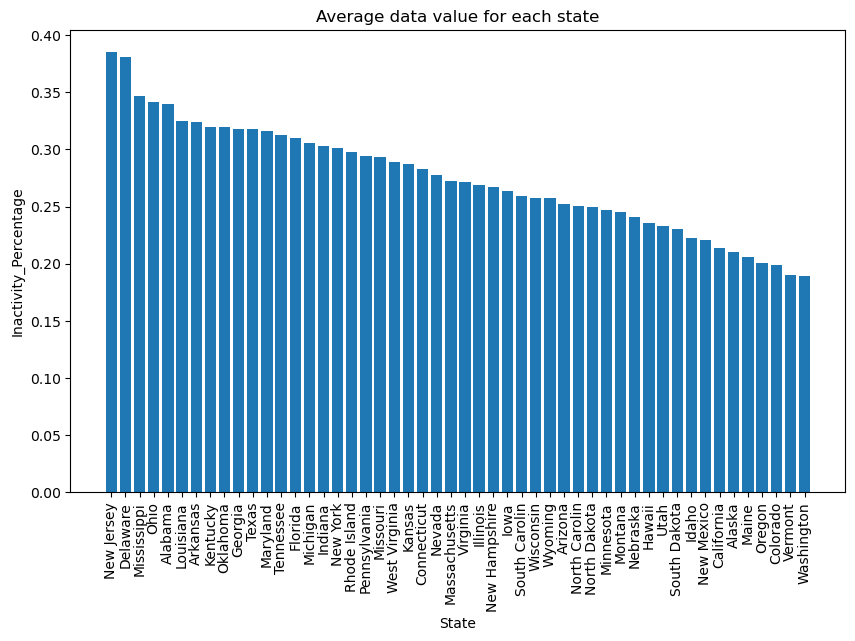

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(state_inactivity_obesity_source_data_sorted_by_inactivity.index, state_inactivity_obesity_source_data_sorted_by_inactivity['Inactivity_Percentage'])
plt.xticks(fontsize = 10, rotation = "vertical")
plt.ylabel("Inactivity_Percentage")
plt.xlabel("State")
plt.title("Average data value for each state")
plt.show()

In [7]:
## Bar Plots by Percentage

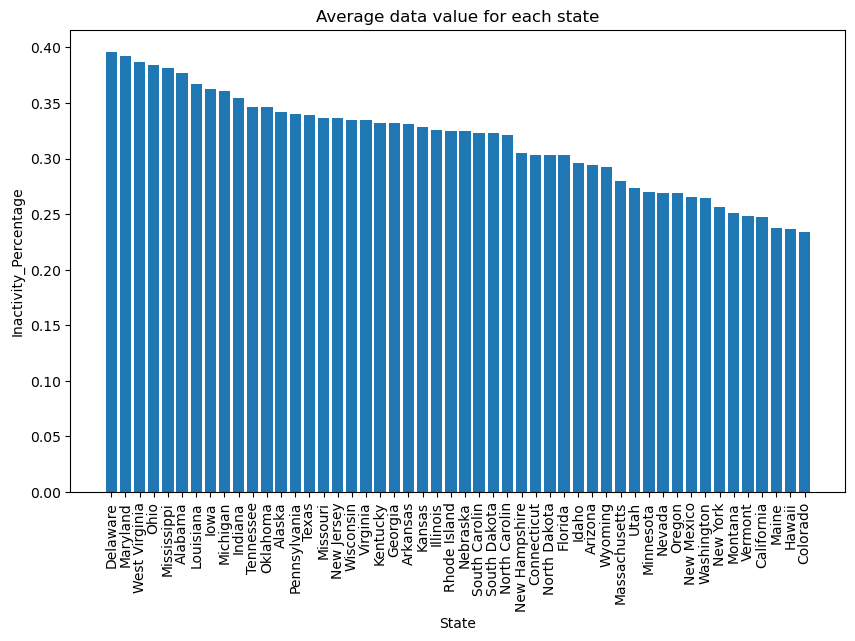

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(state_inactivity_obesity_source_data_sorted_by_obesity.index, state_inactivity_obesity_source_data_sorted_by_obesity['Obesity_Percentage'])
plt.xticks(fontsize = 10, rotation = "vertical")
plt.ylabel("Inactivity_Percentage")
plt.xlabel("State")
plt.title("Average data value for each state")
plt.show()

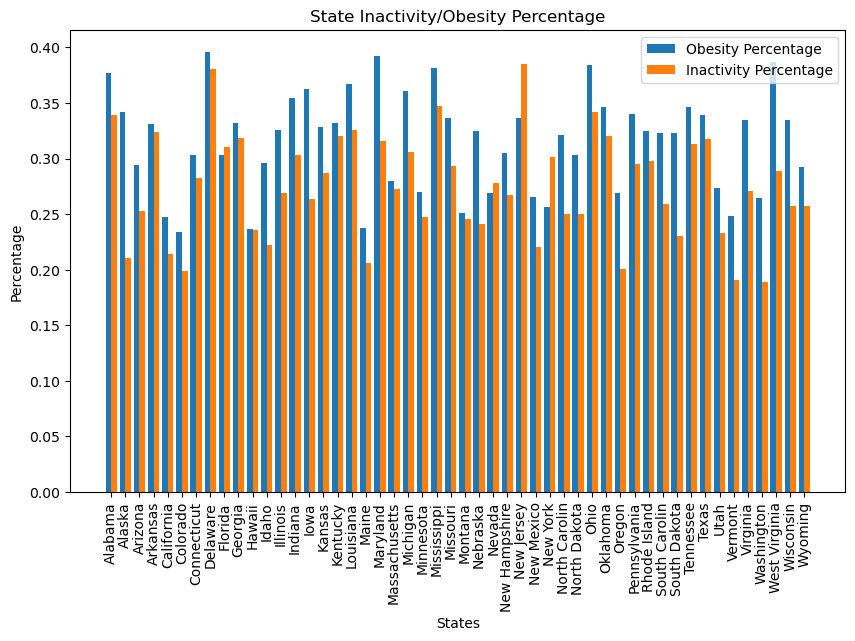

In [9]:
x_label = state_inactivity_obesity_source_data.index
obesity_data = state_inactivity_obesity_source_data["Obesity_Percentage"]
inactivity_data = state_inactivity_obesity_source_data["Inactivity_Percentage"]
x_axis = np.arange(len(x_label))
plt.figure(figsize=(10, 6))
plt.bar(x_axis-0.2, obesity_data, 0.4, label = "Obesity Percentage")
plt.bar(x_axis+0.2, inactivity_data, 0.4, label = "Inactivity Percentage")
plt.xticks(x_axis, x_label, rotation = 90)
plt.title("State Inactivity/Obesity Percentage")
plt.xlabel("States")
plt.ylabel("Percentage")
plt.legend()
plt.show()

## Scatter Plot by Percentage

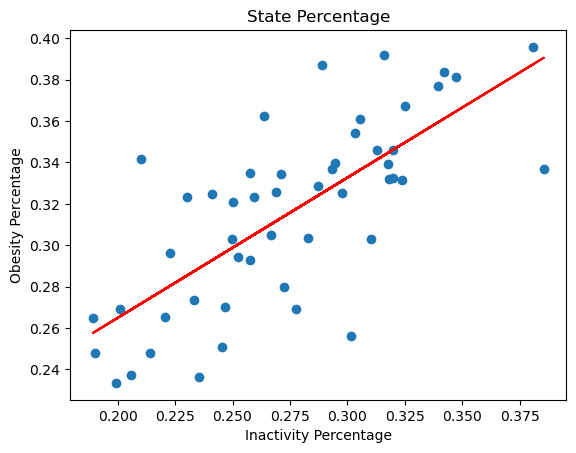

In [10]:
plt.scatter(inactivity_data, obesity_data)
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(inactivity_data, obesity_data)
p_fit = p_slope*inactivity_data+p_int
plt.plot(inactivity_data, p_fit, color = "red")
plt.title("State Percentage")
plt.xlabel("Inactivity Percentage")
plt.ylabel("Obesity Percentage")
plt.show()

# City Analysis

In [11]:
filtered_city_inactivity_data = inactivity_source_data[["StateAbbr","CityName","Data_Value","PopulationCount"]]
filtered_city_inactivity_data = filtered_city_inactivity_data[filtered_city_inactivity_data["Data_Value"].notna()]
filtered_city_inactivity_data = pd.concat([filtered_city_inactivity_data,inactivity_population],axis = 1)
filtered_city_inactivity_data = filtered_city_inactivity_data.groupby(by = "CityName")[["PopulationCount","InactivityPopulation"]].mean()
city_inactivity_percentage = filtered_city_inactivity_data["InactivityPopulation"]/filtered_city_inactivity_data["PopulationCount"]
city_inactivity_percentage.name = "CityInactivityPercentage"
filtered_city_inactivity_data = pd.concat([filtered_city_inactivity_data, city_inactivity_percentage], axis = 1)

In [12]:
filtered_city_obesity_data = obesity_source_data[["StateAbbr", "CityName" ,"Data_Value","PopulationCount"]]
filtered_city_obesity_data = filtered_city_obesity_data[filtered_city_obesity_data["Data_Value"].notna()]
filtered_city_obesity_data = pd.concat([filtered_city_obesity_data, obesity_population],axis = 1)
filtered_city_obesity_data = filtered_city_obesity_data.groupby(by = "CityName")[["PopulationCount","ObesityPopulation"]].mean()
city_obesity_percentage = filtered_city_obesity_data["ObesityPopulation"]/filtered_city_obesity_data["PopulationCount"]
city_obesity_percentage.name = "CityObesityPercentage"
filtered_city_obesity_data = pd.concat([filtered_city_obesity_data, city_obesity_percentage], axis = 1)
filtered_city_obesity_data

,PopulationCount,ObesityPopulation,CityObesityPercentage
CityName,,,
Abilene,9004.692308,3035.179487,0.337066
Akron,8784.176471,3316.323529,0.377534
Alameda,12302.000000,2463.444444,0.200247
Albany,9561.272727,3321.636364,0.347405
Albuquerque,11780.611511,3187.589928,0.270579
...,...,...,...
Wyoming,13523.187500,4438.062500,0.328182
Yakima,13005.761905,4841.095238,0.372227
Yonkers,11092.981132,3028.509434,0.273011


## Scatter Plot by Percentage

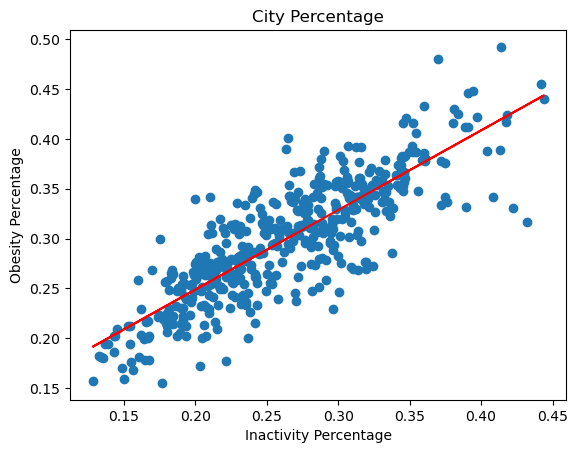

In [13]:
plt.scatter(filtered_city_inactivity_data["CityInactivityPercentage"], filtered_city_obesity_data["CityObesityPercentage"])
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(filtered_city_inactivity_data["CityInactivityPercentage"], filtered_city_obesity_data["CityObesityPercentage"])
p_fit = p_slope*filtered_city_inactivity_data["CityInactivityPercentage"]+p_int
plt.plot(filtered_city_inactivity_data["CityInactivityPercentage"], p_fit, color = "red")
plt.title("City Percentage")
plt.xlabel("Inactivity Percentage")
plt.ylabel("Obesity Percentage")
plt.show()

<bound method Figure.show of <Figure size 640x480 with 2 Axes>>

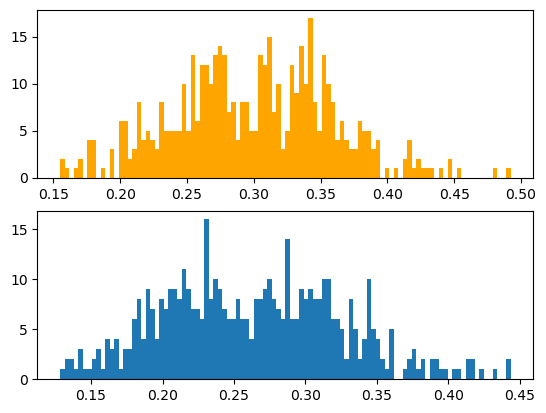

In [14]:
fig, (ax1 ,ax2) = plt.subplots(2)
ax1.hist(filtered_city_obesity_data["CityObesityPercentage"], bins=100, color = "Orange")
ax2.hist(filtered_city_inactivity_data["CityInactivityPercentage"], bins=100)
fig.show

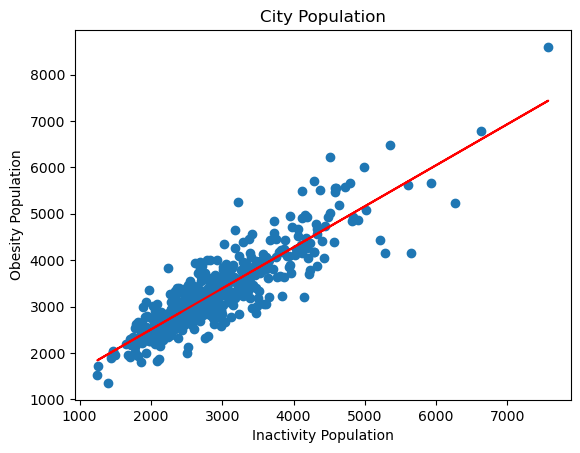

In [15]:
plt.scatter(filtered_city_inactivity_data["InactivityPopulation"], filtered_city_obesity_data["ObesityPopulation"])
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(filtered_city_inactivity_data["InactivityPopulation"], filtered_city_obesity_data["ObesityPopulation"])
p_fit = p_slope*filtered_city_inactivity_data["InactivityPopulation"]+p_int
plt.plot(filtered_city_inactivity_data["InactivityPopulation"], p_fit, color = "red")
plt.title("City Population")
plt.xlabel("Inactivity Population")
plt.ylabel("Obesity Population")
plt.show()

# County Analysis

In [16]:
county_data_source = Path("Resources/uscities.csv")
county_data = pd.read_csv(county_data_source)
county_data = county_data[["city", "county_name"]]
county_data = county_data.rename(columns = {"city": "CityName", "county_name": "CountyName"})
county_data = county_data.drop_duplicates(subset = ["CityName"])

In [17]:
county_inactivity_data = filtered_city_inactivity_data.merge(county_data, on = "CityName", how = "left")
county_inactivity_data = county_inactivity_data.groupby(by = "CountyName")[["PopulationCount", "InactivityPopulation"]].sum()
county_inactivity_percentage = county_inactivity_data["InactivityPopulation"]/county_inactivity_data["PopulationCount"]
county_inactivity_percentage.name = "CountyInactivityPercentage"
county_inactivity_data = county_inactivity_data.merge(county_inactivity_percentage, on = "CountyName", how = "left")

In [18]:
county_obesity_data = filtered_city_obesity_data.merge(county_data, on = "CityName", how = "left")
county_obesity_data = county_obesity_data.groupby(by = "CountyName")[["PopulationCount", "ObesityPopulation"]].sum()
county_obesity_percentage = county_obesity_data["ObesityPopulation"]/county_obesity_data["PopulationCount"]
county_obesity_percentage.name = "CountyObesityPercentage"
county_obesity_data = county_obesity_data.merge(county_obesity_percentage, on = "CountyName", how = "left")

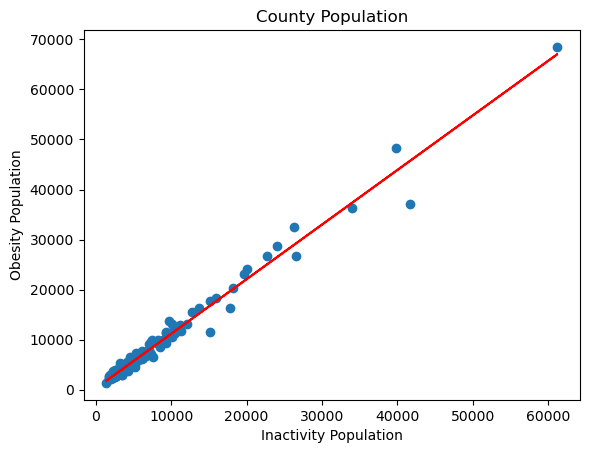

In [19]:
plt.scatter(county_inactivity_data["InactivityPopulation"],county_obesity_data["ObesityPopulation"])
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(county_inactivity_data["InactivityPopulation"],county_obesity_data["ObesityPopulation"])
p_fit = p_slope*county_inactivity_data["InactivityPopulation"]+p_int
plt.plot(county_inactivity_data["InactivityPopulation"], p_fit, color = "red")
plt.title("County Population")
plt.ylabel("Obesity Population")
plt.xlabel("Inactivity Population")
plt.show()

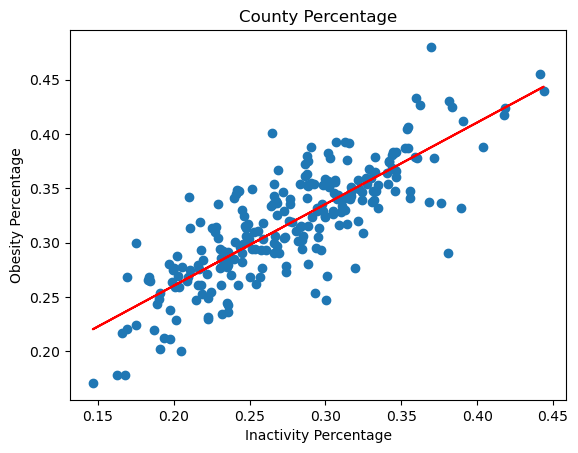

In [20]:
plt.scatter(county_inactivity_data["CountyInactivityPercentage"],county_obesity_data["CountyObesityPercentage"])
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(county_inactivity_data["CountyInactivityPercentage"],county_obesity_data["CountyObesityPercentage"])
p_fit = p_slope*county_inactivity_data["CountyInactivityPercentage"]+p_int
plt.plot(county_inactivity_data["CountyInactivityPercentage"], p_fit, color = "red")
plt.title("County Percentage")
plt.xlabel("Inactivity Percentage")
plt.ylabel("Obesity Percentage")
plt.show()